## Model Description

Linguistic Inquiry and Word Count (LIWC) is a sentiment analysis model based on over 100 dictionaries. In each of these dictionaries, words are assiociated with psychological state, as positive, negative, but also moralization and cognitive process for example. LIWC analyzes each word and compare it with the dictionnaries, to output the percentage of word that belong to each category. In our case, only the 'positive tone' and 'negative tone' category are of interest.

## Method & Results

The free LIWC demo version has a 5000 character limit, so the first step is to divide the text in several chunks that can be run through the demo.


In [128]:
import os
import math

def split_text(name,max_character=5000):
    '''
    Split the text to equal chunks shorter or equal to the maximum character length.
    Create a folder with text files containing the chunks.
    :param name: Name of the Wikipedia article
    :param full_text: number of vectors taken from orthogonal basis
    :param max_character: time vector
    '''

    path='./plaintext_articles/'+name+'.txt'
    with open(path,'r',encoding='utf-8') as input_file:
        full_text=input_file.read()

    os.mkdir('./'+name)

    len_tot=len(full_text)

    nbr=math.ceil(len_tot/max_character)
    idx=len(full_text)//nbr

    for i in range(1,nbr+1):

        if i==nbr:
            text_to_add=full_text[idx*(i-1):]
        else:
            text_to_add=full_text[idx*(i-1):idx*i]

        with open('./'+name+'/'+str(i)+'.txt', 'w',encoding='utf-8') as output_file:
            output_file.write(text_to_add)

Once this is done, the txt files are run through the demo version ([link](https://www.liwc.app/demo)). This is done for all the verification articles. The results are written in a csv file, each column corresponding to an article, sorted alphabetically:

In [129]:
import pandas as pd

df=pd.read_csv('./score.csv')

df

,pos,1.497,2.64,0.676,0.12,2.02,1.946,1.079,1.483,1.269,...,1.735,0.978,0.95,1.235,1.7,3.544,3.34,1.3,2.79,2.189
0,neg,2.213,0.55,2.277,0.835,1.57,1.253,2.338,0.472,0.935,...,1.612,1.408,1.82,0.587,0.5,2.17,0.55,3.91,1.19,0.778


As these results are in percentage of words, it must still be converted to one final score between -1 and 1 representing the positiveness of the article. This is done using the ratio of postive and negative tone.

In [130]:
import numpy as np
import csv

def final_score(csv_file_path='./score.csv'):
    '''
    Calculate the ratios of the negative and positive to get a final score.
    Create a csv file finalscore.csv with all the final scores.
    :param csv_file_path: Path to the csv file with positive and negative scores.
    '''
    
    with open(csv_file_path,'r') as file:
        csv_reader=csv.reader(file)
        rows=list(csv_reader)

    score=[]
    
    for l in rows:
        score.append(l[1:])

    for i in range(len(score)):
        for j in range(len(score[i])):
            score[i][j]=float(score[i][j])


    ratios=[]
    for i in range(len(score[0])):

        a=score[0][i]
        b=score[1][i]

        if a<=b:
            ratios.append(-1+(a/b))
        else:
            ratios.append(1-(b/a))

    ratios=np.around(ratios,3)

    return ratios


ratios=final_score()

pd.DataFrame(ratios).to_csv('./finalscore.csv',header=False,index=False)

pd.DataFrame(ratios)

,0
0,-0.324
1,0.792
2,-0.703
3,-0.856
4,0.223
5,0.356
6,-0.538
7,0.682
8,0.263
9,0.638


## Comparison

The results are then compared to the expected results (manually evaluated). Both can be plotted on a graph to have a visualization of the accuracy of the model. The mean square error is then calculated.

The mean square error of the model on the validation articles is 0.381691


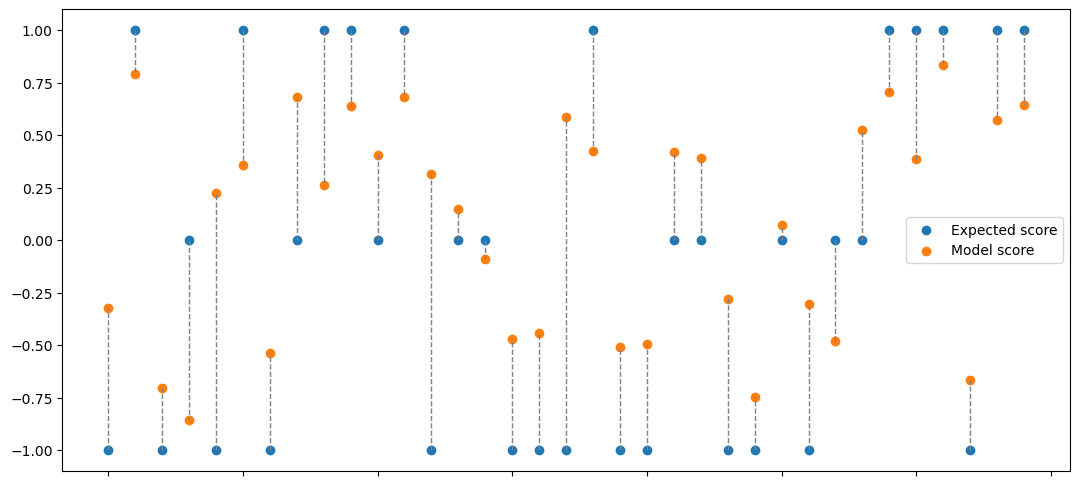

In [131]:
import matplotlib.pyplot as plt

expected_score=np.array([-1,1,-1,0,-1,1,-1,0,1,1,0,1,-1,0,0,-1,-1,-1,1,-1,-1,0,0,-1,-1,0,-1,0,0,1,1,1,-1,1,1])
model_score=ratios

errors=expected_score-model_score

x=np.arange(len(expected_score))

fig,ax=plt.subplots(1,figsize=(13,6))

ax.scatter(x,expected_score,label='Expected score')
ax.scatter(x,model_score,label='Model score')

for i in range(len(x)):
    ax.plot([x[i],x[i]],[expected_score[i],model_score[i]],color='gray',linestyle='--',linewidth=1)

ax.set_xticklabels([])
ax.legend()

mse=np.mean(np.square(errors))

print(f'The mean square error of the model on the validation articles is {mse}')

The plot can be modified so that the value are rounded to either 0, 1 or -1. This make sense to do as the expected scores were only labelled as 0, 1 or -1, so there is no significance to continuous results (depicting the strongness of the positiveness).

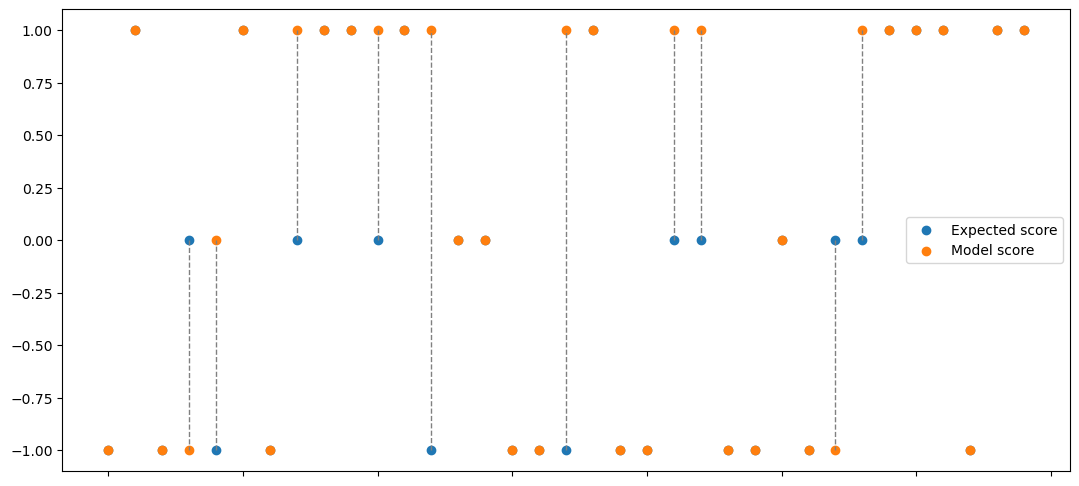

In [132]:
border=0.25
model_score_modified=np.copy(model_score)

for i in range(len(model_score)):

    if abs(model_score[i])<=border:
        model_score_modified[i]=0

    elif model_score[i]>border:
        model_score_modified[i]=1
    
    elif model_score[i]<-border:
        model_score_modified[i]=-1

fig,ax=plt.subplots(1,figsize=(13,6))

ax.scatter(x,expected_score,label='Expected score')
ax.scatter(x,model_score_modified,label='Model score')

for i in range(len(x)):
    ax.plot([x[i],x[i]],[expected_score[i],model_score_modified[i]],color='gray',linestyle='--',linewidth=1)

ax.set_xticklabels([])
ax.legend()

errors=model_score_modified-expected_score
i=0
for x in errors:
    if x!=0:
        i+=1



Even though majority of the results are the same as the one predicted, there is still 10/35 wrong results, which makes the model not completely suitable for our project. The previous mean square error of 0.382 confirm this analysis.

This is probably due to the fact that LIWC is a model meant to be used on more personal data as speeches, tweets or letter for example.